## Assignment 3

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os; print(os.getcwd())

/content


In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans



In [ ]:
from sklearn.metrics import silhouette_score

In [53]:
from google.colab import drive
drive.mount('/content/drive')

data=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/protein-angle-dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data.drop('position',inplace=True,axis=1)

# Nytt avsnitt

In [ ]:
phi=data['phi']

In [ ]:
psi=data['psi']

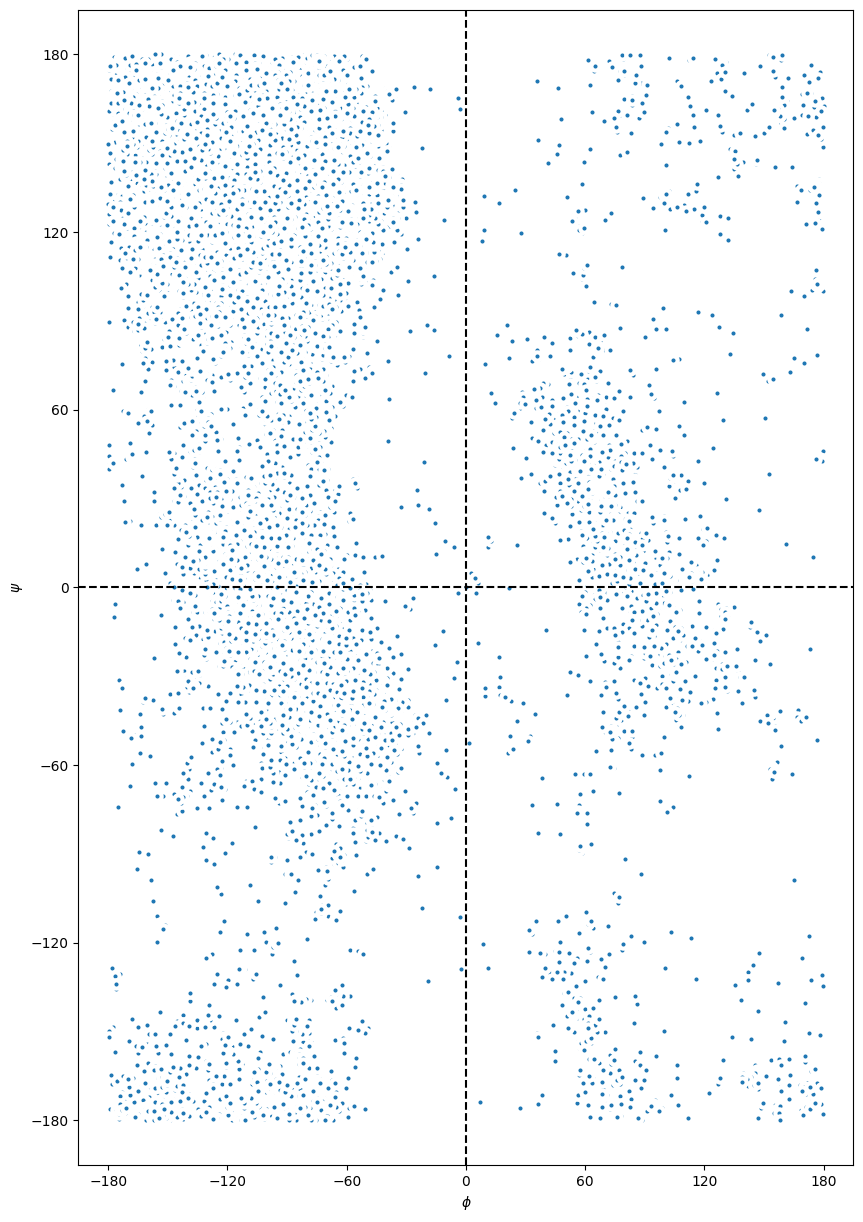

In [ ]:
mean_phi = np.mean(phi)
mean_psi = np.mean(psi)
plt.figure(figsize=(10,15))

plt.tight_layout()
plt.scatter(phi, psi,  linewidth=3, edgecolors='w')
plt.xlim([-195,195])
plt.ylim([-195,195])
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.axhline(y=0,color='k',linestyle='--')
plt.axvline(x=0,color='k',linestyle='--')
plt.xticks(np.arange(-180, 181, step=60))
plt.yticks(np.arange(-180, 181, step=60))

plt.show()

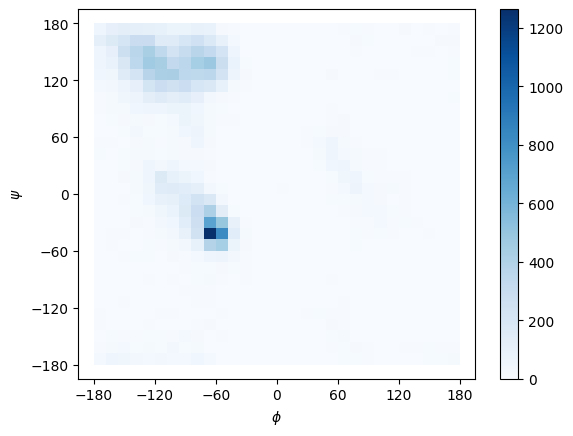

In [ ]:
plt.hist2d(phi,psi,bins=30,cmap='Blues')
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.xlim([-195,195])
plt.ylim([-195,195])
plt.xticks(np.arange(-180, 181, step=60))
plt.yticks(np.arange(-180, 181, step=60))
plt.show()


## Uppgift 2: Use the k-means clustering method to cluster the phi and psi angle combinations in the data file.



a)Experiment with different values of k. Suggest an appropriate value of k for this task and
motivate this choice

In [ ]:
data_array=data.to_numpy()

In [ ]:
print(data_array)

[['LYS' 'A' -149.312855 142.657714]
 ['PRO' 'A' -44.28321 136.002076]
 ['LYS' 'A' -119.972621 -168.705263]
 ...
 ['ILE' 'B' -113.586448 112.09197]
 ['ASN' 'B' -100.668779 -12.102821]
 ['LYS' 'B' -169.95124 94.23368]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


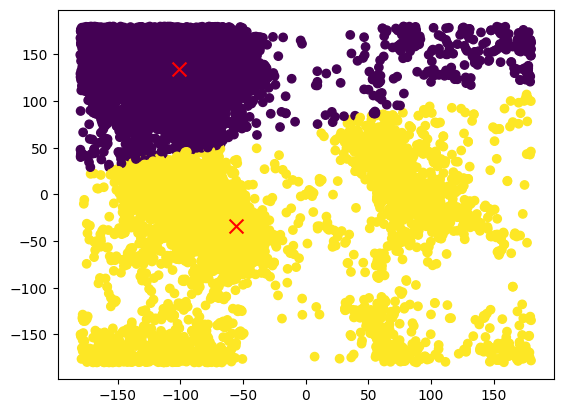

In [ ]:
# Select only the numeric columns (for example 'phi' and 'psi') for clustering
data_numeric = data.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
data_array = data_numeric.values

# Number of clusters
k = 2
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


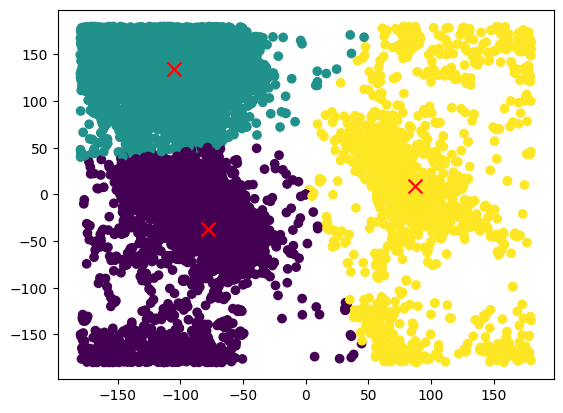

In [ ]:
# Number of clusters
k = 3
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


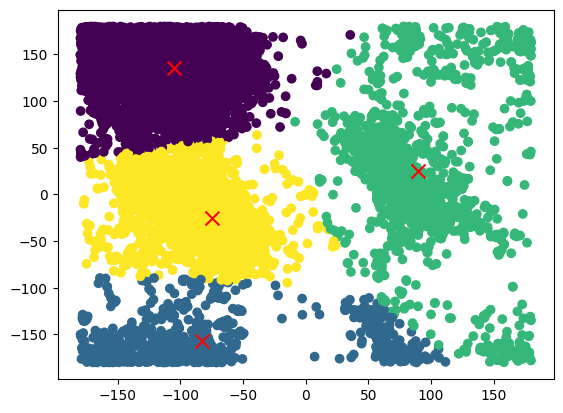

In [ ]:
# Number of clusters
k = 4
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

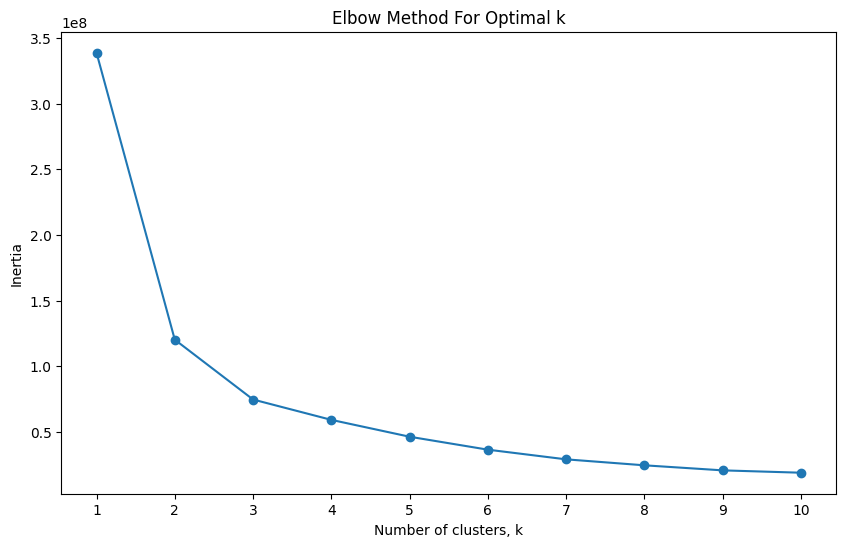

In [ ]:
# Assuming 'data' is your dataset
inertia = []
range_of_clusters = range(1, 11)  # Example: checking for 1 to 10 clusters

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_array)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()



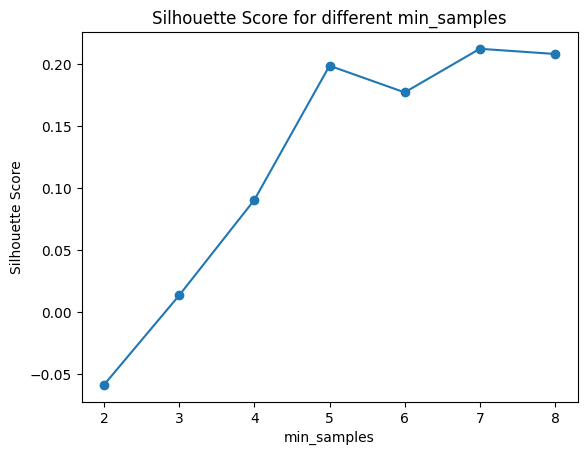

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)
eps_value = 0.15  # Assuming you've already chosen an eps value based on the elbow method
min_samples_values = range(2,9 )  # Example range, adjust as needed
silhouette_scores = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples).fit(data_scaled)
    labels = dbscan.labels_

    # Silhouette score is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    if len(set(labels)) > 1 and len(set(labels)) < len(data_scaled):
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid or trivial clustering

# Plot silhouette scores
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different min_samples')
plt.show()



##Task 3: Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

This code is using the DBSCAN algorithm to cluster a dataset (dataset containing values for phi and psi angles) and then analyzes and visualizes the results.
It involves standardizing the data, applying DBSCAN clustering, visualizing the results through scatter plots and histograms, determining the optimal parameters for DBSCAN using a k-distance graph, and analyzing the outliers identified by DBSCAN, specifically looking at the frequency of amino acid residue types among these outliers.

The code below will be commented to explain what the code does step-by-step!

Text(0, 0.5, 'psi')

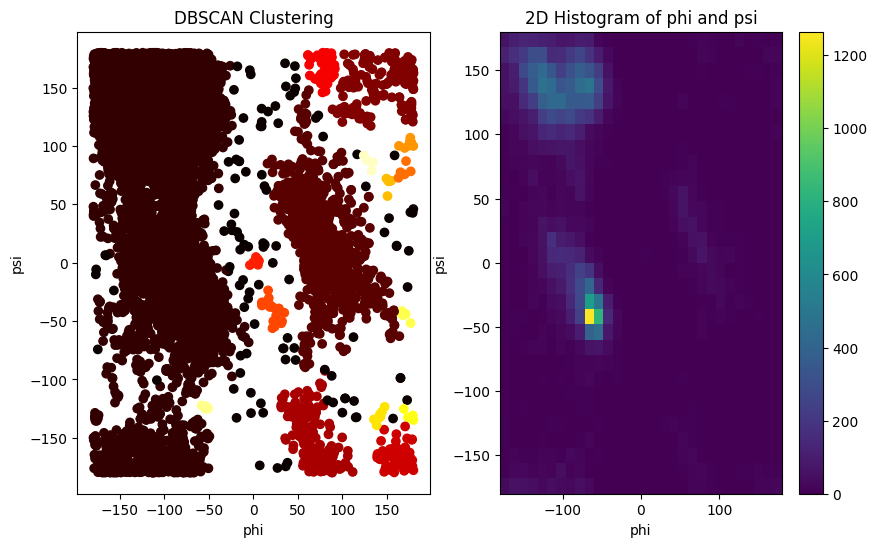

In [51]:
# data_array have been assigned to X. The data in X is then standardized so that each feature has a mean of 0 and a standard deviation of 1.

X =data_array
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN clustering is applied to the standardized data with seperate values on epsilon and minimum sample sizes seperately.

dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)

# Extract labels that was assigned by DBSCAN

labels = dbscan.labels_

# Plot results of the DBSCAN clustering and the previous 2D histogram that uses the original data using various functions:

plt.figure(figsize=(10, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

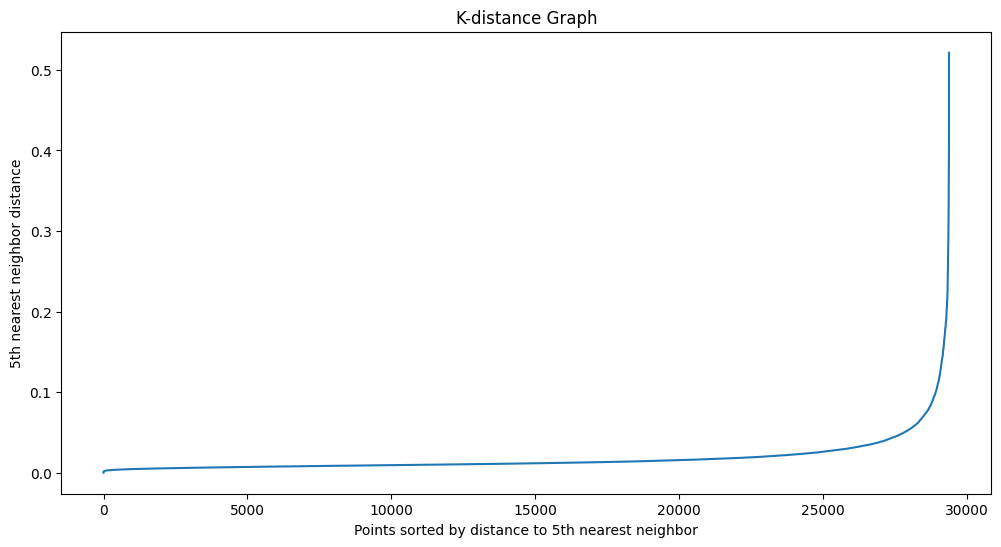

In [55]:
#The module below is used (specifically NearestNeighbors) to create a k-distance graph which is then used to
#determine the most appropriate value epsilon value for DBSCAN.

from sklearn.neighbors import NearestNeighbors

# An instance of NearestNeighbors is created with n_neighbors set to 5.
# This means that for each point in the dataset, the algorithm will find the 5 nearest neighbors.
# Then, nearest_neighbors is fitted to the scaled dataset from before so that... ASDF


nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data_scaled)

# Finds the distance to the nearest n points for each point and return two arrays
distances, indices = nearest_neighbors.kneighbors(data_scaled)

# Sorts the distances array along the first axis (row-wise).
#Then, each row of distances contains the distances from a point to its nearest neighbors in order

distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plots the k-distance graph

plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()


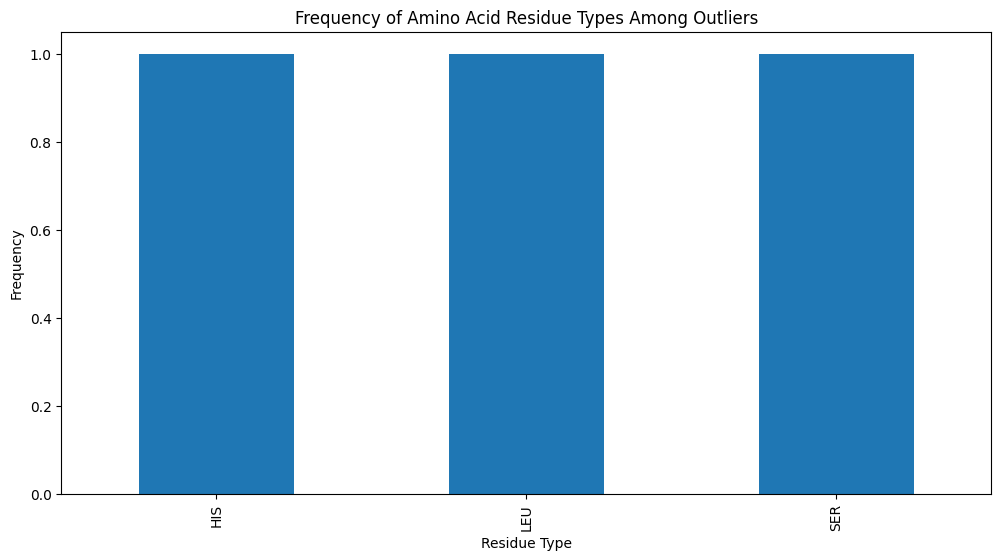

In [57]:
# The code snippet below is designed to analyze and visualize the outliers detected in the dataset
# after applying DBSCAN clustering. It is done in the following steps:

outlier_indices = np.where(labels == -1)[0] # This line identifies the indices of the outlier points in the dataset.

# This line creates a new DataFrame outliers_data that contains only
# the rows from the original DataFrame data that correspond to the outlier indices.

outliers_data = data.iloc[outlier_indices]

# Counts the frequency of each unique value in the column 'residue name' of the 'outliers_data'

outlier_residue_counts = outliers_data['residue name'].value_counts()

# Checks if the outlier_residue_counts object is not empty, meaning there are outliers to analyze.

if not outlier_residue_counts.empty:

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    outlier_residue_counts.plot(kind='bar')
    plt.title('Frequency of Amino Acid Residue Types Among Outliers')
    plt.xlabel('Residue Type')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No outliers were detected.")




## Task4: The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). Note: the parameters might have to be adjusted from those used in question 3.

<ipython-input-40-187d310d37a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


      residue name chain        phi         psi
1              PRO     A -44.283210  136.002076
17             PRO     A -49.944645  -25.888991
68             PRO     A -76.452014   97.745207
110            PRO     A -53.054020  -27.254912
123            PRO     A -66.751364   94.099782
...            ...   ...        ...         ...
29284          PRO     B -54.565923  -42.141418
29339          PRO     B -66.803083  136.260650
29340          PRO     B -59.612140  160.048387
29347          PRO     B -48.679835  135.208297
29356          PRO     B -61.621274  -41.694960

[1596 rows x 4 columns]


Text(0, 0.5, 'psi')

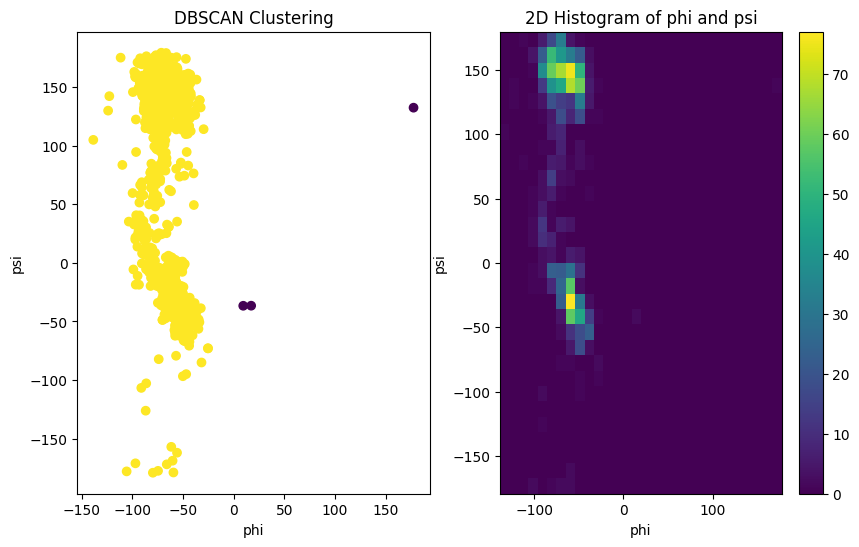

In [ ]:
data=pd.read_csv(r'//content/drive/MyDrive/Colab Notebooks/protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
print(residue)
X =residue_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=1, min_samples=3).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plot results
plt.figure(figsize=(10, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

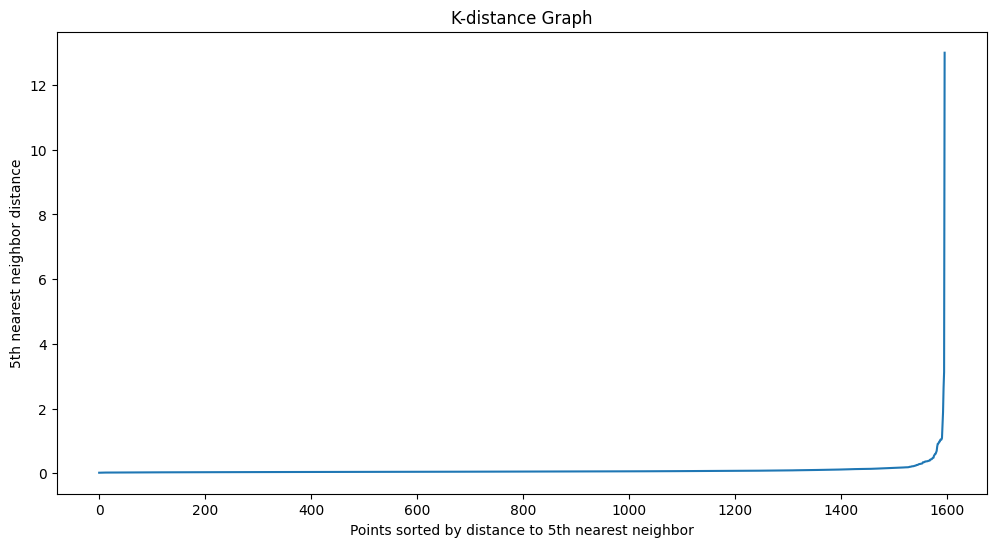

In [ ]:
# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'phi' and 'psi' are the columns of interest
# X = data[['phi', 'psi']].values

# It's important to standardize the data for DBSCAN
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Use the NearestNeighbors class to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_scaled)

# Find the distance to the nearest n points for each point
distances, indices = nearest_neighbors.kneighbors(X_scaled)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plot the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()

<ipython-input-43-310502bcbbbe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


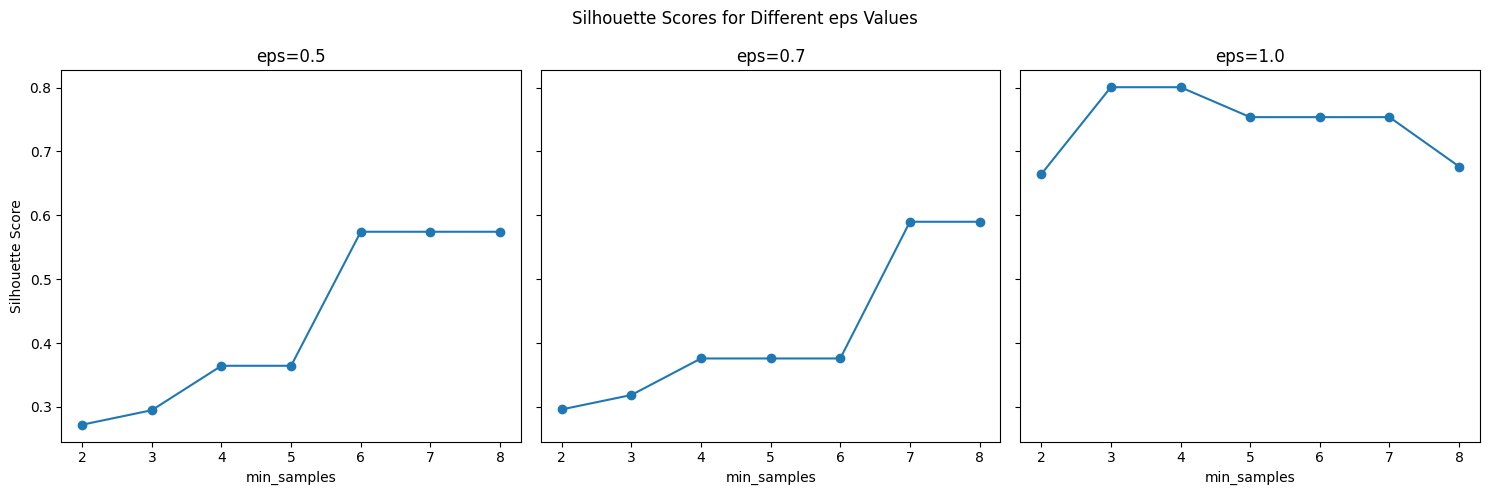

In [ ]:

# Load and preprocess the data
data = pd.read_csv(r'//content/drive/MyDrive/Colab Notebooks/protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])
residue_array = residue_numeric.values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(residue_array)

# Define ranges for eps and min_samples
eps_values = [0.5, 0.7, 1.0]  # Example eps values
min_samples_range = range(2, 9)  # Range of min_samples values

# Create subplots for each eps value
fig, axes = plt.subplots(1, len(eps_values), figsize=(15, 5), sharey=True)

for i, eps in enumerate(eps_values):
    silhouette_scores = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Compute silhouette score only if valid
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            score = silhouette_score(X_scaled, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)  # Invalid or trivial clustering

    # Plot silhouette scores for this eps value
    ax = axes[i]
    ax.plot(min_samples_range, silhouette_scores, marker='o')
    ax.set_title(f'eps={eps}')
    ax.set_xlabel('min_samples')
    if i == 0:
        ax.set_ylabel('Silhouette Score')

plt.suptitle('Silhouette Scores for Different eps Values')
plt.tight_layout()
plt.show()


<ipython-input-50-dd1452641977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


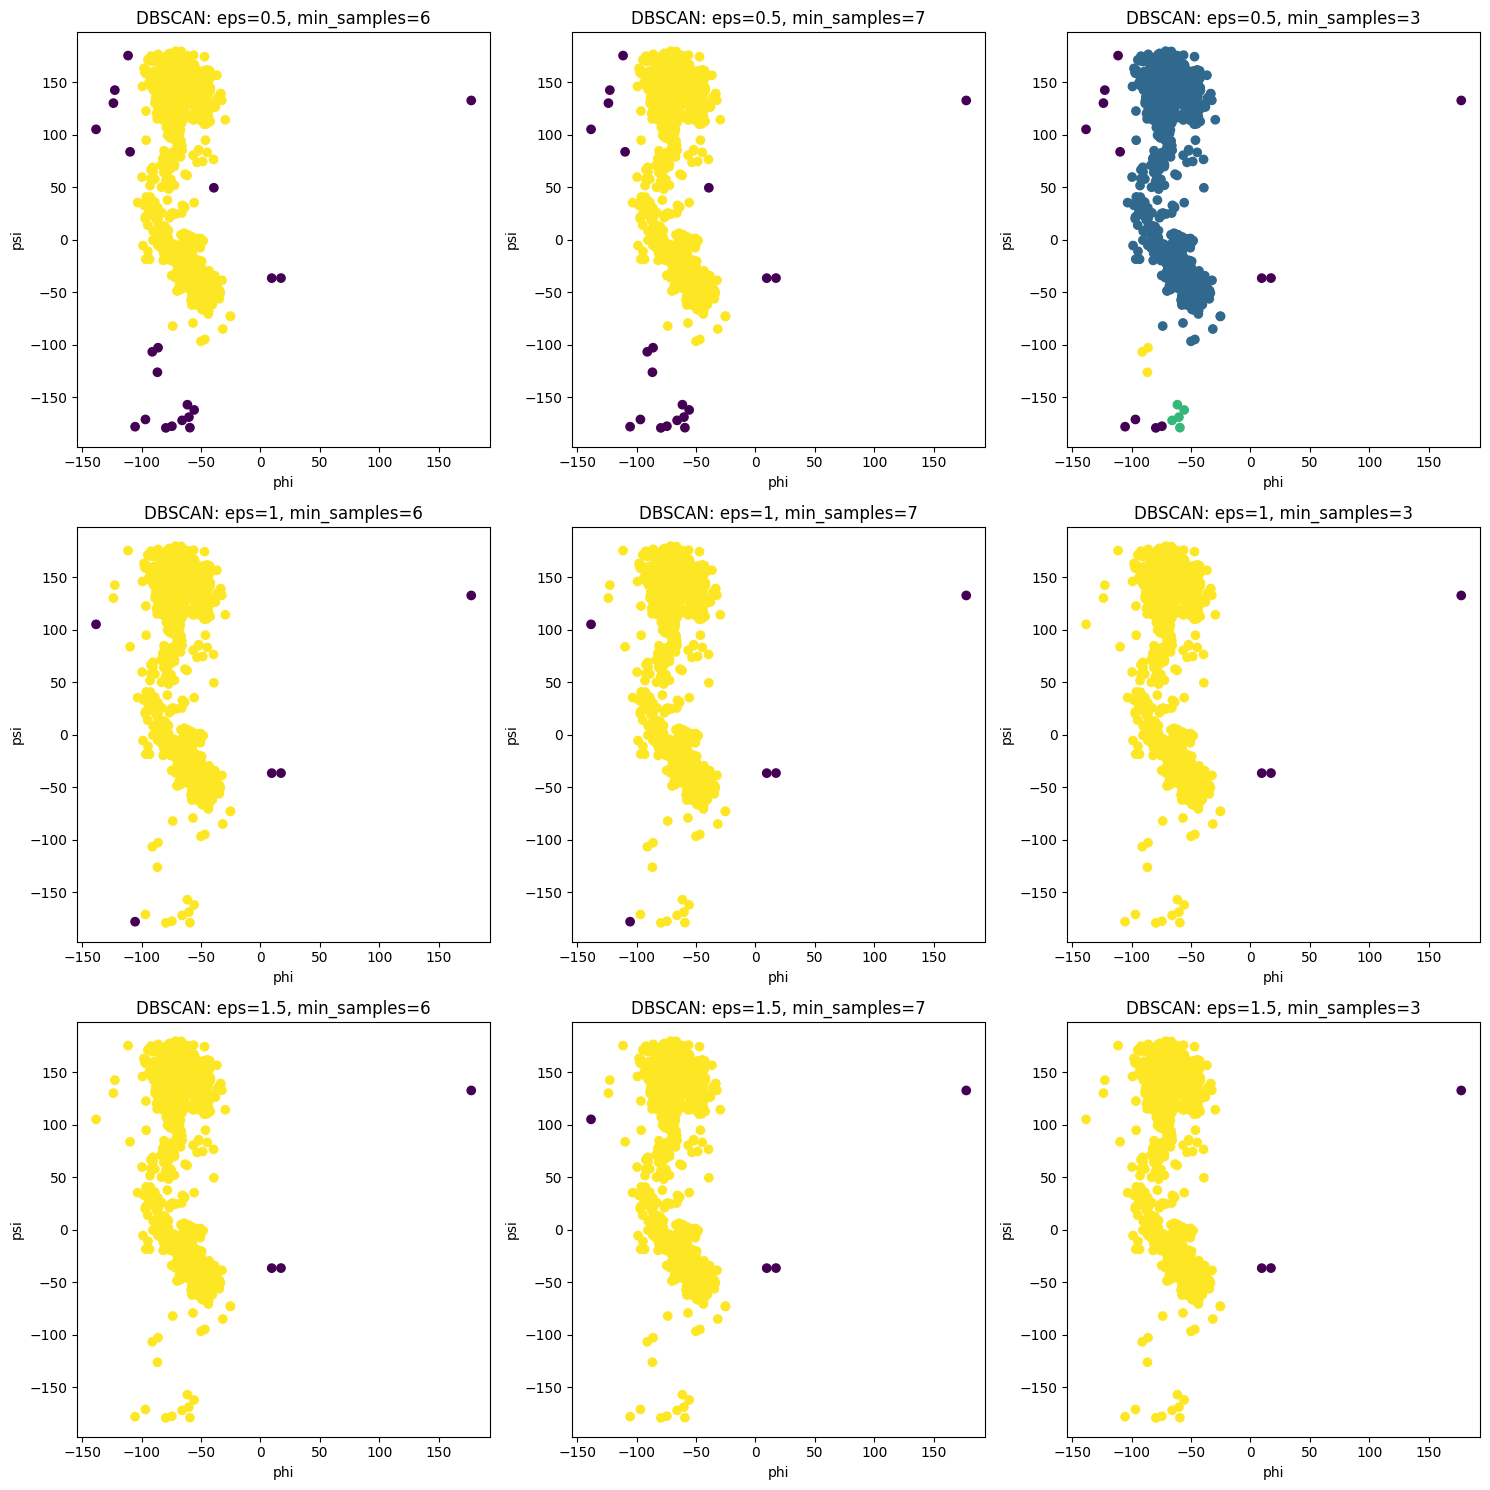

In [50]:

# Load the data
data = pd.read_csv(r'//content/drive/MyDrive/Colab Notebooks/protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert to NumPy array
X = residue_numeric.values
X_scaled = StandardScaler().fit_transform(X)

# Define different values for eps and min_samples
eps_values = [0.5, 1, 1.5]  # Example values
min_samples_values = [6, 7, 3]  # Example values

# Create subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Perform DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Select the subplot
        ax = axes[i, j]

        # Scatter plot
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('phi')
        ax.set_ylabel('psi')

plt.tight_layout()
plt.show()

<ipython-input-52-ee0ac762229d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


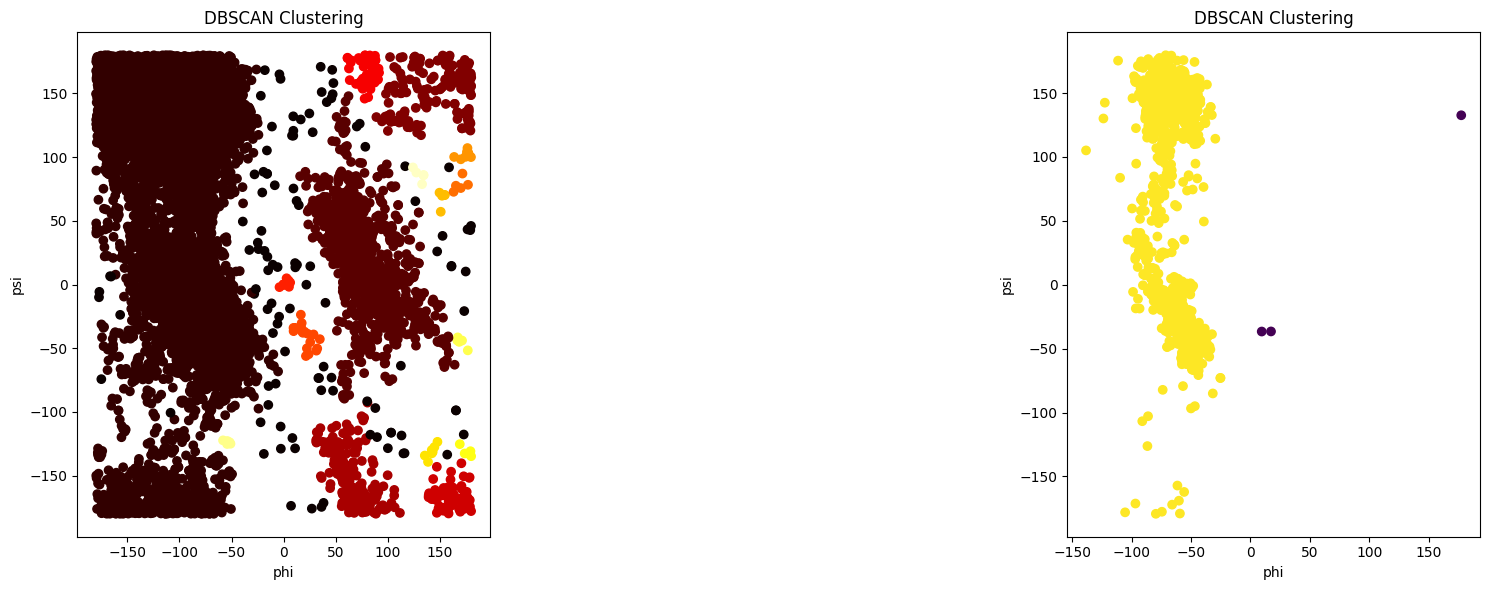

In [52]:

# Create a figure and a set of subplots with 1 row and 2 columns
  # figsize can be adjusted as needed

# Now, you can plot on each subplot by indexing into the 'axes' array.

# Plot on the first subplot (index 0)
X =data_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plot results
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')



data = pd.read_csv(r'//content/drive/MyDrive/Colab Notebooks/protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
P =residue_array
P_scaled = StandardScaler().fit_transform(P)



dbscan = DBSCAN(eps=1, min_samples=3).fit(P_scaled)

# Extract labels
labels = dbscan.labels_



# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(P[:, 0], P[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')


# Ensure that the plots are not overlapping
plt.tight_layout()

# Display the figure with subplots
plt.show()

